In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler 
from sklearn.preprocessing import RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn import preprocessing

In [2]:
#Loading in the dataset
adult_df = pd.read_csv("adult.data", header = None)
adult_df.columns = ["age", "workclass","fnlwgt (representation)", "education", "education number", "marital status", "occupation", "relationship", "race", "sex"
              ,"capital gain", "capital loss", "hours per week", "native country", "more or less than $50k"]
adult_df


,age,workclass,fnlwgt (representation),education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,more or less than $50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#one hot encoding
workclassDF = pd.get_dummies(adult_df["workclass"])
raceDF = pd.get_dummies(adult_df["race"])
sexDF = pd.get_dummies(adult_df["sex"])
maritalDF = pd.get_dummies(adult_df["marital status"])
educationDF = pd.get_dummies(adult_df["education"])
occupationDF = pd.get_dummies(adult_df["occupation"])
occupationDF = occupationDF.drop(" ?", axis = 1)
relationshipDF = pd.get_dummies(adult_df["relationship"])
nativeCDF = pd.get_dummies(adult_df["native country"])
nativeCDF = nativeCDF.drop(" ?", axis = 1)

adult_df = adult_df.drop(["workclass", "education", "marital status", "occupation", "relationship", "race", "sex", "native country"], axis = 1)

In [4]:
adjusted_df = raceDF.join([maritalDF, sexDF, educationDF, occupationDF, relationshipDF, nativeCDF])
adult_data_df = adjusted_df.join(adult_df)
adult_data_df

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,...,United-States,Vietnam,Yugoslavia,age,fnlwgt (representation),education number,capital gain,capital loss,hours per week,more or less than $50k
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,39,77516,13,2174,0,40,<=50K
1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,50,83311,13,0,0,13,<=50K
2,0,0,0,0,1,1,0,0,0,0,...,1,0,0,38,215646,9,0,0,40,<=50K
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,53,234721,7,0,0,40,<=50K
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,28,338409,13,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,1,0,0,...,1,0,0,27,257302,12,0,0,38,<=50K
32557,0,0,0,0,1,0,0,1,0,0,...,1,0,0,40,154374,9,0,0,40,>50K
32558,0,0,0,0,1,0,0,0,0,0,...,1,0,0,58,151910,9,0,0,40,<=50K
32559,0,0,0,0,1,0,0,0,0,1,...,1,0,0,22,201490,9,0,0,20,<=50K


In [5]:
#checking and cleaning data
adult_data_df.dtypes

 Amer-Indian-Eskimo        uint8
 Asian-Pac-Islander        uint8
 Black                     uint8
 Other                     uint8
 White                     uint8
                           ...  
education number           int64
capital gain               int64
capital loss               int64
hours per week             int64
more or less than $50k    object
Length: 98, dtype: object

In [6]:
##checking and cleaning data
adult_data_df.isnull().sum()

 Amer-Indian-Eskimo       0
 Asian-Pac-Islander       0
 Black                    0
 Other                    0
 White                    0
                         ..
education number          0
capital gain              0
capital loss              0
hours per week            0
more or less than $50k    0
Length: 98, dtype: int64

In [7]:
#Standardizing data
adult_data_df["more or less than $50k"] = adult_data_df["more or less than $50k"].replace(' <=50K','1')
adult_data_df["more or less than $50k"] = adult_data_df["more or less than $50k"].replace(' >50K','2')

def standardize(string):
    output = int(string)
    return output

adult_data_df["more or less than $50k"] = adult_data_df["more or less than $50k"].apply(standardize)

In [8]:
adult_data_df["more or less than $50k"].unique()

array([1, 2], dtype=int64)

## Logistic Regression

#### Trial 1

In [9]:
#Defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 1)


In [10]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model = clf.fit(X_train, Y_train)

Wall time: 2min 56s


In [11]:
best_model.cv_results_

{'mean_fit_time': array([0.03231916, 0.11928124, 0.05166187, 0.16495862, 0.47693353,
        0.29461732, 3.41596923, 0.88982086, 3.99911213, 1.5365005 ,
        2.85575237, 1.77908969, 3.05419531, 1.90877204, 3.60204306,
        2.07738423, 3.93459487, 2.01523409, 0.02922392, 0.02992015,
        0.03969436, 0.06463051, 0.07001629, 0.1474772 , 0.17265592,
        0.11341114, 0.13574657, 0.11859331, 1.99270768]),
 'std_fit_time': array([0.00545575, 0.00491058, 0.00632072, 0.01341916, 0.0616478 ,
        0.00731378, 0.60044618, 0.05744994, 0.84573775, 0.19431331,
        0.90916032, 0.5033779 , 0.75084887, 0.41156746, 0.76706357,
        0.42479606, 0.84049997, 0.47919037, 0.00132554, 0.0014103 ,
        0.006414  , 0.01675977, 0.01349455, 0.08345415, 0.06669035,
        0.007145  , 0.03088221, 0.02078426, 0.50679414]),
 'mean_score_time': array([0.01455574, 0.0045876 , 0.00618348, 0.00438843, 0.00577569,
        0.00458245, 0.00458751, 0.00478678, 0.00478148, 0.00417967,
        0.005573

In [12]:
best_model.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21,  1,  3,  2,  3,  9,  3,  3,  9,  9,  9,  9,
        9, 26, 24, 21,  3,  3, 16, 16, 16, 16, 16,  9])

In [13]:
best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [14]:
best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [15]:
best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2510
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2510
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2510
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1824
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1724
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1598
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1528
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1564
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1554
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1564


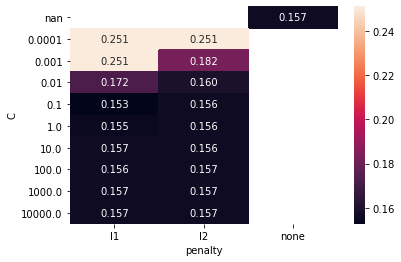

In [16]:
results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score_acc'] = 1 - best_model.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results

In [212]:
#assigning result
acc_1 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1528")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.251000
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.251000
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.251000
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.177509
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.159375
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.134057
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.125549
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.124773
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.123271
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.123604


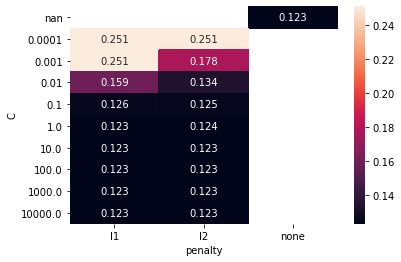

In [18]:
results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score_precision'] = 1 - best_model.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results

In [262]:
#assigning result
precision_1 = ("C = 10, penality = l2, solver = saga, precision = 0.123218")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2510
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2510
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2510
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1824
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1724
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1598
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1528
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1564
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1554
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1564


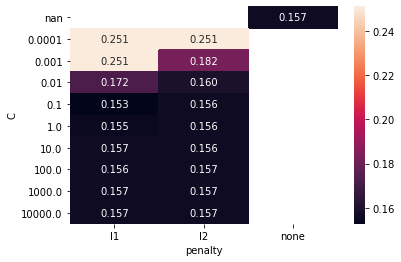

In [20]:
results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score_f1_micro'] = 1 - best_model.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results

In [214]:
#assigning result
f1micro_1 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1528")

#### Trial 2

In [22]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 2)


In [23]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model2 = clf.fit(X_train, Y_train)

Wall time: 4min 34s


In [24]:
best_model2.cv_results_

{'mean_fit_time': array([0.03370962, 0.14463682, 0.05144372, 0.18732214, 0.54436193,
        0.41399641, 2.66617212, 1.5241375 , 6.9334301 , 2.86850901,
        5.34063973, 3.27376165, 5.4641551 , 3.2851378 , 5.74951234,
        3.46606264, 5.82002878, 3.23360782, 0.02393599, 0.02453432,
        0.02754021, 0.04088063, 0.06137509, 0.07974668, 0.06353154,
        0.07470436, 0.07889228, 0.09655509, 3.09010005]),
 'std_fit_time': array([0.00603002, 0.00862017, 0.00429826, 0.00813917, 0.06351997,
        0.04246469, 0.53556997, 0.15061366, 0.67185123, 0.28512317,
        0.55331955, 0.34986643, 0.52830148, 0.28069531, 0.5549878 ,
        0.61102743, 0.6216278 , 0.3138069 , 0.00154514, 0.00119673,
        0.00119039, 0.00220008, 0.01551262, 0.03111943, 0.0091371 ,
        0.01004973, 0.00689311, 0.03562186, 0.37481722]),
 'mean_score_time': array([0.00728221, 0.00889482, 0.00619254, 0.00679007, 0.00538554,
        0.00937476, 0.00678196, 0.01745458, 0.0064847 , 0.00718079,
        0.005584

In [25]:
best_model2.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21, 20, 16,  1,  3, 12,  4,  4,  4,  4,  4,  4,
        4, 26, 24, 21, 16,  2, 12, 12, 18, 18, 12,  4])

In [26]:
best_model2.cv_results_['params'][ np.argmin(best_model2.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [27]:
best_model2.cv_results_['params'][ np.argmin(best_model2.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [28]:
best_model2.cv_results_['params'][ np.argmin(best_model2.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2312
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2312
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2312
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1678
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1606
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1490
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1436
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1422
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1412
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1416


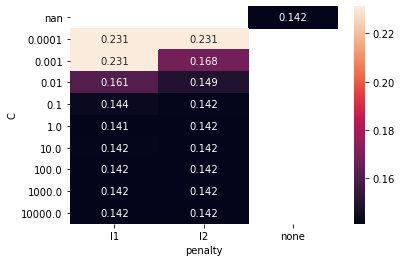

In [29]:
results2 = pd.DataFrame( best_model2.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results2['score_acc'] = 1 - best_model2.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols2 = results2.columns.to_series().str.split('__').apply(lambda x: x[-1])
results2.columns = cols2

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results2.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results2

In [215]:
#assigning result
acc_2 = ("c = 1.0, penalty = l1, solver = saga, acc = 0.1412")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.231200
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.231200
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.231200
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.166016
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.147598
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.127078
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.117458
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.115177
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.113328
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.113002


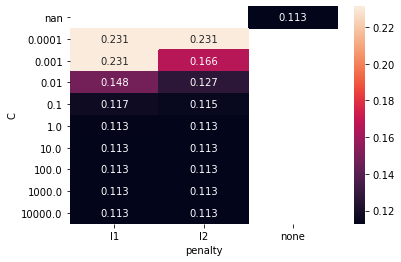

In [31]:
results2 = pd.DataFrame( best_model2.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results2['score_precision'] = 1 - best_model2.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols2 = results2.columns.to_series().str.split('__').apply(lambda x: x[-1])
results2.columns = cols2

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results2.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results2

In [216]:
#assigning result
precision_2 = ("C = 10.0, penality = l2, solver = saga, precision = 0.112837")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2312
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2312
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2312
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1678
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1606
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1490
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1436
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1422
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1412
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1416


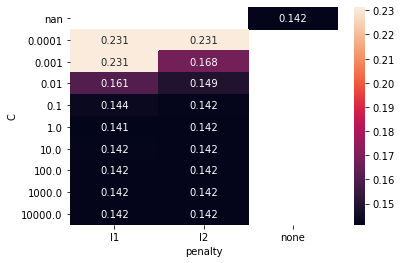

In [33]:
results2 = pd.DataFrame( best_model2.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results2['score_f1_micro'] = 1 - best_model2.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols2 = results2.columns.to_series().str.split('__').apply(lambda x: x[-1])
results2.columns = cols2

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results2.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results2

In [217]:
f1micro_2 = ("c = 1.0, penalty = l1, solver = saga, f1_micro = 0.1412")

#### Trial 3

In [35]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 3)


In [36]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model3 = clf.fit(X_train, Y_train)

Wall time: 4min 2s


In [37]:
best_model3.cv_results_

{'mean_fit_time': array([0.03131604, 0.12237687, 0.0478744 , 0.16772332, 0.48889904,
        0.32095804, 1.66104965, 1.26295238, 8.88486934, 2.25461445,
        4.25988002, 2.89674697, 4.76369681, 2.46025515, 4.77723289,
        2.65579638, 4.9726438 , 2.66744657, 0.137641  , 0.060043  ,
        0.05016766, 0.05166516, 0.058745  , 0.11599531, 0.08896704,
        0.12517056, 0.11230636, 0.12098165, 2.69162717]),
 'std_fit_time': array([0.00731796, 0.00265004, 0.00326035, 0.004329  , 0.05964464,
        0.01760074, 0.15230818, 0.09027308, 2.21983383, 0.32244517,
        0.61172486, 0.29581437, 0.35317257, 0.28891943, 0.53999539,
        0.32374087, 0.63382055, 0.34644017, 0.14604002, 0.03664661,
        0.02380105, 0.00657298, 0.00343119, 0.04318219, 0.00738956,
        0.0370344 , 0.01105579, 0.05151525, 0.24288787]),
 'mean_score_time': array([0.02234311, 0.00418887, 0.00438833, 0.00469599, 0.00478697,
        0.00608048, 0.00478678, 0.00438824, 0.00436954, 0.00438385,
        0.004774

In [38]:
best_model3.cv_results_['rank_test_accuracy']

array([28, 26, 28, 24, 23, 21,  1,  2,  4,  5,  7, 15,  7,  7,  7,  7,  7,
        7, 26, 24, 21,  2,  5, 15, 17, 17, 17, 17,  7])

In [39]:
best_model3.cv_results_['params'][ np.argmin(best_model3.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [40]:
best_model3.cv_results_['params'][ np.argmin(best_model3.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [41]:
best_model3.cv_results_['params'][ np.argmin(best_model3.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2354
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2352
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2354
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1766
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1728
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1610
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1572
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1574
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1580
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1592


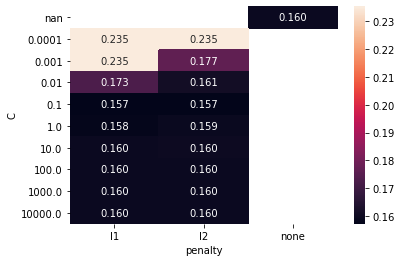

In [42]:
results3 = pd.DataFrame( best_model3.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results3['score_acc'] = 1 - best_model3.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols3 = results3.columns.to_series().str.split('__').apply(lambda x: x[-1])
results3.columns = cols3

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results3.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results3

In [218]:
#assigning result
acc_3 = ("c = 1.0, penalty = l1, solver = saga, acc = 0.1572")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.235400
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.235247
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.235400
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.171726
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.159007
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.135857
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.128057
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.125878
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.125419
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.125959


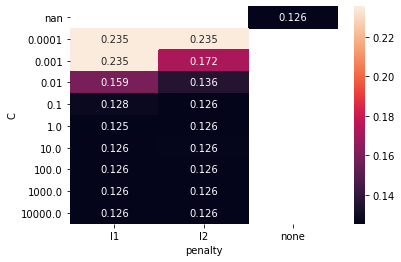

In [44]:
results3 = pd.DataFrame( best_model3.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results3['score_precision'] = 1 - best_model3.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols3 = results3.columns.to_series().str.split('__').apply(lambda x: x[-1])
results3.columns = cols3

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results3.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results3

In [219]:
#assigning result
precision_3 = ("C = 1.0, penality = l1, solver = saga, precision = 0.125419")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2354
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2352
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2354
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1766
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1728
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1610
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1572
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1574
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1580
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1592


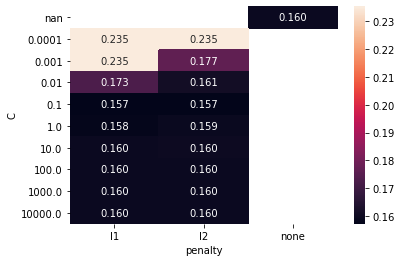

In [46]:
results3 = pd.DataFrame( best_model3.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results3['score_f1_micro'] = 1 - best_model3.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols3 = results3.columns.to_series().str.split('__').apply(lambda x: x[-1])
results3.columns = cols3

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results3.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results3

In [220]:
#assigning result
f1micro_3 = ("c = 1.0, penalty = l1, solver = saga, f1_micro = 0.1572")

#### Trial 4

In [48]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 4)


In [49]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model4 = clf.fit(X_train, Y_train)

Wall time: 3min 36s


In [50]:
best_model4.cv_results_

{'mean_fit_time': array([0.02712722, 0.15336566, 0.05457368, 0.18269854, 0.53243442,
        0.36967807, 2.81423965, 1.26034317, 4.76002431, 2.3229147 ,
        4.11291485, 2.66576018, 4.26748419, 2.57697477, 4.22348733,
        2.22758265, 4.39471602, 2.57851648, 0.06821723, 0.02902422,
        0.03789883, 0.13065424, 0.06413589, 0.15598922, 0.18062434,
        0.08747125, 0.14641871, 0.10113349, 2.53489451]),
 'std_fit_time': array([2.13001341e-03, 1.02910446e-02, 5.07968067e-03, 8.46218925e-03,
        7.26490038e-02, 2.73123682e-02, 2.66878638e-01, 5.26601503e-02,
        1.35965461e+00, 4.61298816e-01, 6.57667310e-01, 4.90953812e-01,
        6.73509758e-01, 2.49484100e-01, 6.19926184e-01, 2.55399105e-01,
        8.21713597e-01, 4.80459098e-01, 5.97090507e-02, 1.10835708e-03,
        7.32854122e-03, 9.66130301e-02, 4.06275223e-03, 8.75033115e-02,
        7.78813503e-02, 1.17552899e-02, 6.60149292e-02, 2.22891589e-02,
        3.61855583e-01]),
 'mean_score_time': array([0.00508814, 

In [51]:
best_model4.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 22,  3, 19,  1, 14, 11,  2,  3,  3,  3,  3,  3,
        3, 26, 25, 21, 19, 18, 11, 11, 15, 15, 15,  3])

In [52]:
best_model4.cv_results_['params'][ np.argmin(best_model4.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [54]:
best_model4.cv_results_['params'][ np.argmin(best_model4.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [55]:
best_model4.cv_results_['params'][ np.argmin(best_model4.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2388
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2388
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2388
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1724
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1656
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1546
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1478
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1496
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1468
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1482


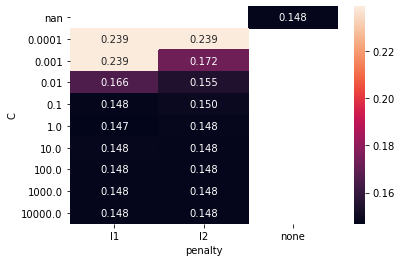

In [56]:
results4 = pd.DataFrame( best_model4.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results4['score_acc'] = 1 - best_model4.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols4 = results4.columns.to_series().str.split('__').apply(lambda x: x[-1])
results4.columns = cols4

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results4.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results4

In [221]:
#assigning result
acc_4 = ("c = 1.0, penalty = l1, solver = saga, acc = 0.1468")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.238800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.238800
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.238800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.168065
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.149623
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.131016
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.120607
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.120133
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.116499
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.117074


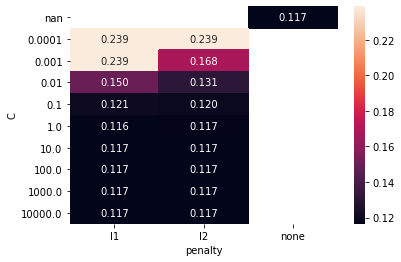

In [58]:
results4 = pd.DataFrame( best_model4.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results4['score_precision'] = 1 - best_model4.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols4 = results4.columns.to_series().str.split('__').apply(lambda x: x[-1])
results4.columns = cols4

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results4.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results4

In [222]:
#assigning result
precision_4 = ("c = 1.0, penalty = l1, solver = saga, precision = 0.116499")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2388
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2388
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2388
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1724
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1656
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1546
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1478
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1496
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1468
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1482


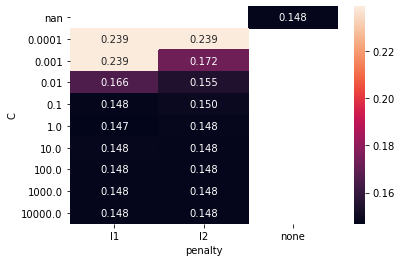

In [60]:
results4 = pd.DataFrame( best_model4.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results4['score_f1_micro'] = 1 - best_model4.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols4 = results4.columns.to_series().str.split('__').apply(lambda x: x[-1])
results4.columns = cols4

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results4.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results4

In [223]:
#assigning result
f1micro_4 = ("c = 1.0, penalty = l1, solver = saga, f1_micro = 0.1468")

#### Trial 5

In [62]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 5)


In [63]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model5 = clf.fit(X_train, Y_train)

Wall time: 4min 22s


In [64]:
best_model5.cv_results_

{'mean_fit_time': array([0.02527761, 0.12609706, 0.04627614, 0.17253847, 0.76277657,
        0.32481637, 2.56125965, 1.11048841, 4.94879937, 2.9025928 ,
        5.16159601, 3.1928916 , 5.47828097, 3.24120169, 5.94491386,
        3.18890071, 5.90207448, 3.02784262, 0.03231454, 0.04465461,
        0.03661833, 0.06484833, 0.09383812, 0.15874333, 0.12591681,
        0.1193316 , 0.11724472, 0.12162433, 3.27226853]),
 'std_fit_time': array([0.0038267 , 0.0053301 , 0.00256988, 0.00850946, 0.08210588,
        0.00928605, 1.29650201, 0.16263119, 1.36900899, 0.61020706,
        1.36103626, 0.75732623, 1.26810023, 0.69426216, 1.17615906,
        0.68007252, 1.30211303, 0.61148621, 0.00349112, 0.02005046,
        0.00326612, 0.00926898, 0.0138967 , 0.04120189, 0.06369197,
        0.03879142, 0.04128715, 0.02155176, 0.76959762]),
 'mean_score_time': array([0.00439367, 0.00478692, 0.00438833, 0.00678229, 0.00578456,
        0.00517278, 0.00437679, 0.00458708, 0.00475998, 0.00558486,
        0.005385

In [65]:
best_model5.cv_results_['rank_test_accuracy']

array([28, 26, 28, 24, 23, 21,  1,  2,  4,  7,  5,  5,  7,  7,  7,  7,  7,
        7, 26, 25, 21,  2, 15, 20, 16, 16, 16, 16,  7])

In [66]:
best_model5.cv_results_['params'][ np.argmin(best_model5.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [67]:
best_model5.cv_results_['params'][ np.argmin(best_model5.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [68]:
best_model5.cv_results_['params'][ np.argmin(best_model5.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2394
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2392
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2394
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1724
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1620
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1544
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1486
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1518
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1520
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1532


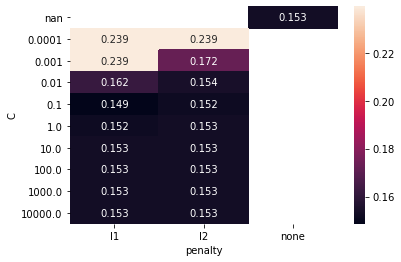

In [69]:
results5 = pd.DataFrame( best_model5.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results5['score_acc'] = 1 - best_model5.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols5 = results5.columns.to_series().str.split('__').apply(lambda x: x[-1])
results5.columns = cols5

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results5.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results5

In [224]:
#assigning result
acc_5 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1486")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.239400
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.239248
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.239400
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.165984
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.144877
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.128232
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.121038
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.119460
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.118158
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.118723


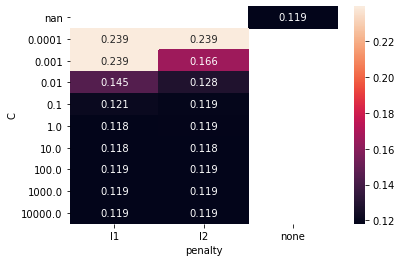

In [71]:
results5 = pd.DataFrame( best_model5.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results5['score_precision'] = 1 - best_model5.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols5 = results5.columns.to_series().str.split('__').apply(lambda x: x[-1])
results5.columns = cols5

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results5.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results5

In [225]:
#assigning result
precision_5 = ("C = 1.0, penality = l1, solver = saga, precision = 0.118158")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2394
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2392
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2394
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1724
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1620
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1544
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1486
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1518
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1520
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1532


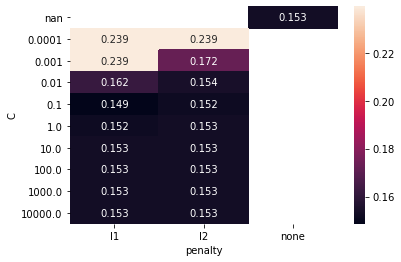

In [73]:
results5 = pd.DataFrame( best_model5.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results5['score_f1_micro'] = 1 - best_model5.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols5 = results5.columns.to_series().str.split('__').apply(lambda x: x[-1])
results5.columns = cols5

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results5.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results5

In [226]:
#assigning result
f1micro_5 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1486")

#### Trial 6

In [75]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 6)


In [76]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision', 'f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model6 = clf.fit(X_train, Y_train)

Wall time: 3min 6s


In [77]:
best_model6.cv_results_

{'mean_fit_time': array([0.03738127, 0.14478326, 0.05636525, 0.19208817, 0.7267581 ,
        0.36753945, 3.98721733, 1.14181986, 5.08606319, 1.80981708,
        2.99653316, 1.91149216, 3.24034739, 1.92103515, 3.32385073,
        1.960992  , 3.3960289 , 1.95393829, 0.03292127, 0.03252506,
        0.03700957, 0.05529151, 0.06841726, 0.12207742, 0.14092517,
        0.14831128, 0.15127416, 0.10507379, 1.93136921]),
 'std_fit_time': array([0.00927775, 0.01358116, 0.01332602, 0.00884214, 0.1056338 ,
        0.01753422, 0.87523045, 0.06766941, 0.83669918, 0.04282905,
        0.16887501, 0.16543309, 0.18519841, 0.08821779, 0.13736639,
        0.11677832, 0.07403257, 0.0979231 , 0.00394093, 0.00490424,
        0.00320766, 0.00691523, 0.01793655, 0.04847994, 0.03577123,
        0.0773266 , 0.06644801, 0.01223901, 0.08133888]),
 'mean_score_time': array([0.00618358, 0.00558805, 0.00498643, 0.00877662, 0.00618367,
        0.00478678, 0.00518579, 0.00648437, 0.00538516, 0.00538096,
        0.005385

In [78]:
best_model6.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21,  1, 20,  2, 13,  3,  3,  6,  6,  6,  6,  6,
        6, 26, 24, 21, 16,  5, 14, 14, 16, 16, 16,  6])

In [79]:
best_model6.cv_results_['params'][ np.argmin(best_model6.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [80]:
best_model6.cv_results_['params'][ np.argmin(best_model6.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [81]:
best_model6.cv_results_['params'][ np.argmin(best_model6.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2416
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2416
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2416
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1730
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1640
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1562
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1484
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1516
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1496
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1502


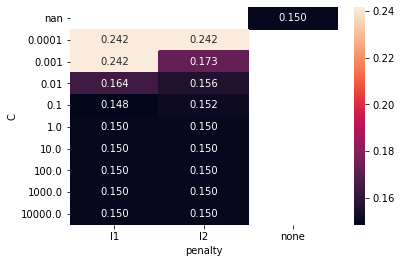

In [82]:
results6 = pd.DataFrame( best_model6.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results6['score_acc'] = 1 - best_model6.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols6 = results6.columns.to_series().str.split('__').apply(lambda x: x[-1])
results6.columns = cols6

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results6.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results6

In [227]:
#assigning result
acc_6 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1484")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.241600
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.241600
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.241600
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.169404
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.149497
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.133407
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.123212
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.124279
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.121357
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.121240


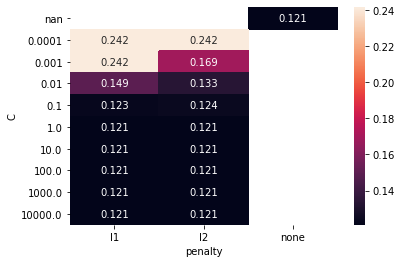

In [211]:
results6 = pd.DataFrame( best_model6.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results6['score_precision'] = 1 - best_model6.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols6 = results6.columns.to_series().str.split('__').apply(lambda x: x[-1])
results6.columns = cols6

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results6.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results6

In [228]:
#assigning result
precision_6 = ("C = 10.0, penality = l1, solver = saga, precision = 0.120993")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2416
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2416
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2416
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1730
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1640
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1562
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1484
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1516
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1496
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1502


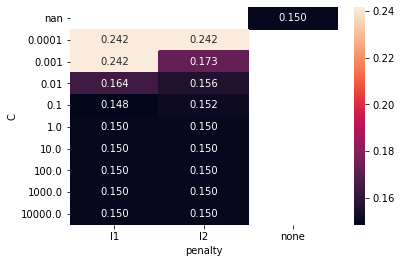

In [86]:
results6 = pd.DataFrame( best_model6.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results6['score_f1_micro'] = 1 - best_model6.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols6 = results6.columns.to_series().str.split('__').apply(lambda x: x[-1])
results6.columns = cols6

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results6.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results6

In [229]:
#assigning result
f1micro_6 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1484")

#### Trial 7

In [88]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 7)


In [89]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model7 = clf.fit(X_train, Y_train)

Wall time: 4min 29s


In [90]:
best_model7.cv_results_

{'mean_fit_time': array([0.03091726, 0.1379632 , 0.05086689, 0.21696634, 0.47955313,
        0.38428984, 2.39999576, 1.50726213, 7.60824351, 2.79748979,
        5.21179457, 3.11866679, 5.13592186, 3.13259354, 5.45371737,
        3.09432106, 5.76725268, 3.05715237, 0.03211379, 0.03321319,
        0.12517066, 0.06084089, 0.10103097, 0.08777356, 0.14603257,
        0.20663157, 0.103229  , 0.11701007, 3.08720646]),
 'std_fit_time': array([0.00244318, 0.01187131, 0.0040996 , 0.01242928, 0.07801576,
        0.02434653, 0.12319086, 0.05499929, 0.66131925, 0.22655595,
        0.22089449, 0.23318188, 0.29459793, 0.20995997, 0.19114492,
        0.19661938, 0.34582705, 0.21123177, 0.00263074, 0.00274428,
        0.1010592 , 0.01275613, 0.0567993 , 0.02618813, 0.08354904,
        0.0916555 , 0.00637727, 0.02254464, 0.17085643]),
 'mean_score_time': array([0.00598431, 0.00568752, 0.0053947 , 0.00697966, 0.00538564,
        0.00607157, 0.0065824 , 0.00568585, 0.00598397, 0.00585246,
        0.005885

In [91]:
best_model7.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21,  1, 19,  2, 18,  3, 16,  5,  5,  5,  5,  5,
        5, 26, 25, 21, 19, 17,  4,  5,  5,  5,  5,  5])

In [92]:
best_model7.cv_results_['params'][ np.argmin(best_model7.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [93]:
best_model7.cv_results_['params'][ np.argmin(best_model7.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [94]:
best_model7.cv_results_['params'][ np.argmin(best_model7.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2406
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2406
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2406
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1808
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1710
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1646
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1554
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1596
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1564
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1580


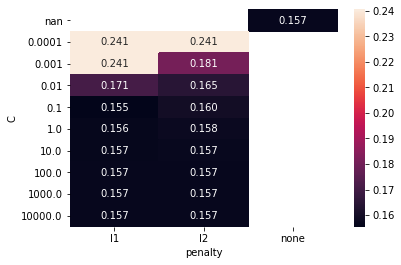

In [95]:
results7 = pd.DataFrame( best_model7.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results7['score_acc'] = 1 - best_model7.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols7 = results7.columns.to_series().str.split('__').apply(lambda x: x[-1])
results7.columns = cols7

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results7.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results7

In [230]:
#assigning result
acc_7 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1554")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.240600
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.240600
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.240600
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.174984
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.156840
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.136767
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.127109
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.128009
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.124527
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.126274


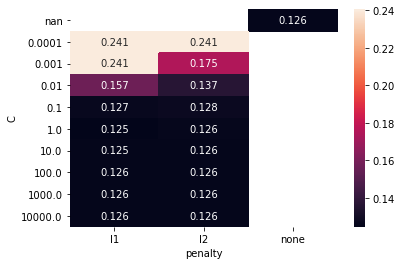

In [97]:
results7 = pd.DataFrame( best_model7.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results7['score_precision'] = 1 - best_model7.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols7 = results7.columns.to_series().str.split('__').apply(lambda x: x[-1])
results7.columns = cols7

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results7.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results7

In [231]:
#assigning result
precision_7 = ("C = 1.0, penality = l1, solver = saga, precision = 0.124527")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2406
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2406
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2406
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1808
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1710
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1646
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1554
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1596
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1564
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1580


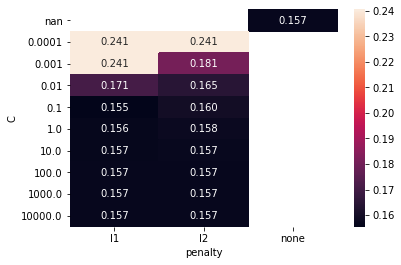

In [99]:
results7 = pd.DataFrame( best_model7.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results7['score_f1_micro'] = 1 - best_model7.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols7 = results7.columns.to_series().str.split('__').apply(lambda x: x[-1])
results7.columns = cols7

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results7.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results7

In [232]:
#assigning result
f1micro_7 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1554")

#### Trial 8

In [101]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 8)


In [102]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model8 = clf.fit(X_train, Y_train)

Wall time: 3min 26s


In [103]:
best_model8.cv_results_

{'mean_fit_time': array([0.03580565, 0.14616652, 0.06203485, 0.19787102, 0.58452487,
        0.35878906, 2.72622809, 1.14504585, 5.20020161, 2.08413177,
        3.74081321, 2.4865694 , 3.77830262, 2.33451304, 4.01090431,
        2.42276373, 4.1673317 , 2.45352201, 0.04926815, 0.03730035,
        0.09158244, 0.09004078, 0.08729954, 0.08475823, 0.09683414,
        0.0858994 , 0.14283538, 0.11212311, 2.35135269]),
 'std_fit_time': array([0.00714043, 0.01092049, 0.0072026 , 0.00911051, 0.11154388,
        0.02089126, 0.68984917, 0.07667038, 1.58937527, 0.32726751,
        0.72983549, 0.60419768, 0.75514276, 0.46646882, 0.76321384,
        0.51507934, 0.84108809, 0.38585058, 0.01829895, 0.00552101,
        0.02993804, 0.0520481 , 0.02404341, 0.00855897, 0.02739674,
        0.00685938, 0.06401417, 0.03863914, 0.47169699]),
 'mean_score_time': array([0.00757966, 0.00538549, 0.00757928, 0.00678167, 0.00536857,
        0.00578461, 0.00498652, 0.00470629, 0.00538626, 0.00817795,
        0.005494

In [104]:
best_model8.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 22, 20, 19, 17, 16, 14, 14,  7,  7,  7,  7,  7,
        7, 26, 24, 21, 18,  6,  1,  1,  1,  1,  1,  7])

In [105]:
best_model8.cv_results_['params'][ np.argmin(best_model8.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [106]:
best_model8.cv_results_['params'][ np.argmin(best_model8.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

In [107]:
best_model8.cv_results_['params'][ np.argmin(best_model8.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'lbfgs'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2384
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2384
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2384
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1704
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1640
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1500
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1448
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1438
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1416
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1414


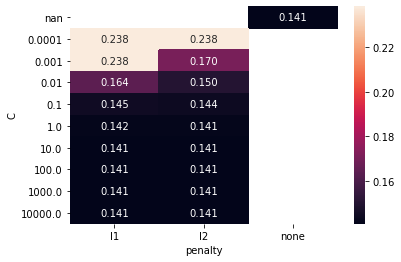

In [108]:
results8 = pd.DataFrame( best_model8.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results8['score_acc'] = 1 - best_model8.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols8 = results8.columns.to_series().str.split('__').apply(lambda x: x[-1])
results8.columns = cols8

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results8.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results8

In [233]:
#assigning result
acc_8 = ("c = 10, penalty = l2, solver = lbfgs, acc = 0.1402")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.238400
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.238400
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.238400
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.166936
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.149714
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.128444
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.119347
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.116761
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.113776
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.113346


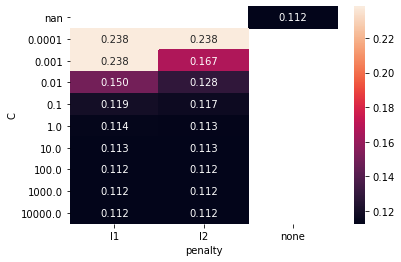

In [110]:
results8 = pd.DataFrame( best_model8.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results8['score_precision'] = 1 - best_model8.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols8 = results8.columns.to_series().str.split('__').apply(lambda x: x[-1])
results8.columns = cols8

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results8.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results8

In [234]:
#assigning result
precision_8 = ("c = 10, penalty = l2, solver = lbfgs, precision = 0.112217")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2384
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2384
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2384
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1704
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1640
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1500
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1448
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1438
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1416
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1414


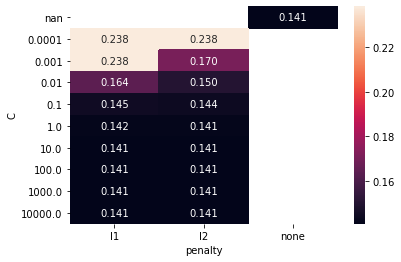

In [112]:
results8 = pd.DataFrame( best_model8.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results8['score_f1_micro'] = 1 - best_model8.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols8 = results8.columns.to_series().str.split('__').apply(lambda x: x[-1])
results8.columns = cols8

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results8.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results8

In [235]:
#assigning result
f1micro_8 = ("c = 10, penalty = l2, solver = lbfgs, f1_micro = 0.1402")

#### Trial 9

In [114]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 9)


In [115]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model9 = clf.fit(X_train, Y_train)

Wall time: 3min 32s


In [116]:
best_model9.cv_results_

{'mean_fit_time': array([0.02553239, 0.13396788, 0.05106688, 0.18518224, 0.59235482,
        0.33303175, 2.80092087, 1.00704026, 5.05151262, 2.05395813,
        4.08120284, 2.57541304, 4.18410001, 2.59451814, 4.52586117,
        2.66241574, 4.29783354, 2.27709069, 0.02852378, 0.02772636,
        0.03231363, 0.05325785, 0.04488025, 0.0726059 , 0.0690186 ,
        0.06402774, 0.06787162, 0.08231001, 2.26967034]),
 'std_fit_time': array([0.00184911, 0.00555964, 0.00247943, 0.00925316, 0.04055276,
        0.02204728, 0.20360913, 0.12154315, 1.15550105, 0.30688347,
        0.63401829, 0.43194846, 0.64518191, 0.43402692, 0.86238025,
        0.47454   , 0.70526257, 0.38704261, 0.00214866, 0.00222118,
        0.00401878, 0.02398239, 0.00356804, 0.00668732, 0.01690474,
        0.00438854, 0.00574086, 0.01733662, 0.35677255]),
 'mean_score_time': array([0.00478706, 0.0046905 , 0.00718112, 0.00548844, 0.00518632,
        0.00438795, 0.00537453, 0.00548801, 0.00498619, 0.00498157,
        0.008872

In [117]:
best_model9.cv_results_['rank_test_accuracy']

array([26, 26, 26, 25, 23, 21,  1, 19,  2,  3,  5,  6,  6,  8,  8,  8,  8,
        8, 26, 24, 21, 19,  3, 14, 15, 15, 15, 15,  8])

In [118]:
best_model9.cv_results_['params'][ np.argmin(best_model9.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [119]:
best_model9.cv_results_['params'][ np.argmin(best_model9.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [120]:
best_model9.cv_results_['params'][ np.argmin(best_model9.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2450
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2450
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2450
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1784
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1678
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1652
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1556
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1602
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1584
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1588


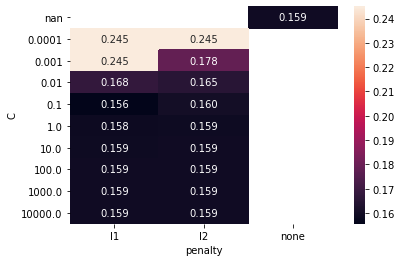

In [121]:
results9 = pd.DataFrame( best_model9.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results9['score_acc'] = 1 - best_model9.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols9 = results9.columns.to_series().str.split('__').apply(lambda x: x[-1])
results9.columns = cols9

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results9.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results9

In [236]:
#assigning result
acc_9 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1556")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.245000
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.245000
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.245000
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.175068
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.155502
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.138214
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.128541
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.127934
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.125775
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.126199


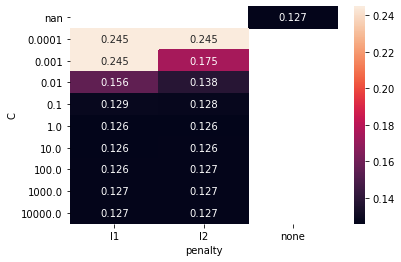

In [123]:
results9 = pd.DataFrame( best_model9.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results9['score_precision'] = 1 - best_model9.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols9 = results9.columns.to_series().str.split('__').apply(lambda x: x[-1])
results9.columns = cols9

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results9.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results9

In [237]:
#assigning result
precision_9 = ("C = 1.0, penality = l1, solver = saga, precision = 0.124527")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2450
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2450
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2450
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1784
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1678
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1652
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1556
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1602
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1584
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1588


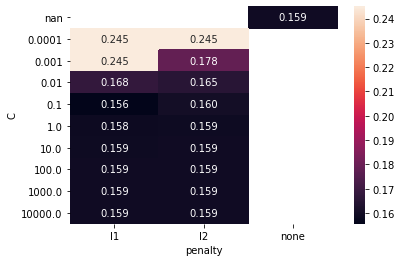

In [125]:
results9 = pd.DataFrame( best_model9.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results9['score_f1_micro'] = 1 - best_model9.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols9 = results9.columns.to_series().str.split('__').apply(lambda x: x[-1])
results9.columns = cols9

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results9.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results9

In [238]:
#assigning result
f1micro_9 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1556")

#### Trial 10

In [127]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 10)


In [128]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model10 = clf.fit(X_train, Y_train)

Wall time: 4min 23s


In [129]:
best_model10.cv_results_

{'mean_fit_time': array([0.02263937, 0.11640892, 0.04687452, 0.16874866, 0.56918859,
        0.31893077, 1.88820238, 1.09585876, 5.45925956, 2.73039517,
        5.25654316, 3.24666553, 5.42322092, 3.27800779, 5.67461343,
        3.14285765, 6.11648736, 3.5637435 , 0.0333322 , 0.03205438,
        0.03651438, 0.06351428, 0.08623462, 0.08024778, 0.09118848,
        0.09901333, 0.27904496, 0.0965415 , 3.49351802]),
 'std_fit_time': array([6.01264138e-04, 6.51591035e-03, 4.92643873e-03, 2.98539249e-03,
        6.96470088e-02, 5.65136800e-03, 7.99587499e-02, 1.53651687e-01,
        1.25161044e+00, 7.72997143e-01, 1.21655061e+00, 8.10304819e-01,
        1.42497176e+00, 8.04760813e-01, 1.40653413e+00, 9.54238513e-01,
        1.67653877e+00, 8.73554871e-01, 4.64974438e-03, 3.97829623e-03,
        1.19092572e-03, 1.62511078e-02, 1.87346357e-02, 1.42028320e-02,
        9.49090504e-03, 2.14210480e-02, 2.68583039e-01, 1.27746020e-02,
        9.21753318e-01]),
 'mean_score_time': array([0.00409064, 

In [130]:
best_model10.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21, 18, 19, 17, 10,  1,  1,  1,  1,  1,  1,  1,
        1, 26, 24, 21, 19, 10, 10, 13, 13, 13, 13,  1])

In [131]:
best_model10.cv_results_['params'][ np.argmin(best_model10.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [132]:
best_model10.cv_results_['params'][ np.argmin(best_model10.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [133]:
best_model10.cv_results_['params'][ np.argmin(best_model10.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2312
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2312
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2312
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1732
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1606
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1550
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1476
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1476
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1474
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1462


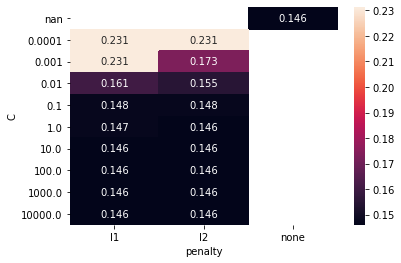

In [134]:
results10 = pd.DataFrame( best_model10.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results10['score_acc'] = 1 - best_model10.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols10 = results10.columns.to_series().str.split('__').apply(lambda x: x[-1])
results10.columns = cols10

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results10.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results10

In [239]:
#assigning result
acc_10 = ("c = 10, penalty = l1, solver = saga, acc = 0.1460")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.231200
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.231200
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.231200
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.167130
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.148087
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.128350
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.119057
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.117668
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.116905
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.115587


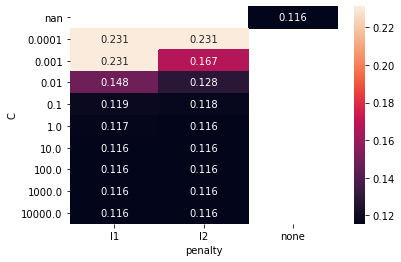

In [136]:
results10 = pd.DataFrame( best_model10.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results10['score_precision'] = 1 - best_model10.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols10 = results10.columns.to_series().str.split('__').apply(lambda x: x[-1])
results10.columns = cols10

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results10.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results10

In [240]:
#assigning result
precision_10 = ("c = 10, penalty = l1, solver = saga, precision = 0.115556")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2312
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2312
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2312
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1732
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1606
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1550
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1476
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1476
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1474
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1462


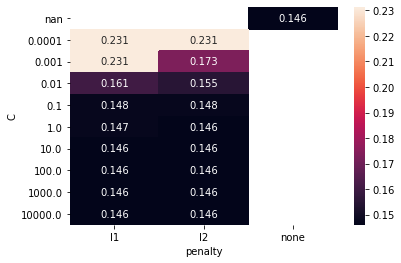

In [138]:
results10 = pd.DataFrame( best_model10.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results10['score_f1_micro'] = 1 - best_model10.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols10 = results10.columns.to_series().str.split('__').apply(lambda x: x[-1])
results10.columns = cols10

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results10.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results10

In [241]:
#assigning result
f1micro_10 = ("c = 10, penalty = l1, solver = saga, f1_micro = 0.1460")

#### Trial 11

In [140]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 11)


In [141]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model11 = clf.fit(X_train, Y_train)

Wall time: 3min 42s


In [142]:
best_model11.cv_results_

{'mean_fit_time': array([0.03231359, 0.15678058, 0.05904236, 0.19927726, 0.61764283,
        0.31514602, 2.07951574, 1.19423795, 5.92664399, 2.37317581,
        4.44610462, 2.73267536, 4.24713383, 2.5335876 , 4.50450749,
        2.73294988, 4.25223699, 2.25715466, 0.04168892, 0.09215379,
        0.05924215, 0.04727378, 0.05306072, 0.09809055, 0.09735026,
        0.09766312, 0.09577079, 0.10001025, 2.87620358]),
 'std_fit_time': array([0.0052999 , 0.0179784 , 0.0058968 , 0.01046713, 0.05492153,
        0.01566137, 0.13114261, 0.10670575, 2.05928333, 0.35066483,
        0.88860698, 0.60890331, 0.64413408, 0.46926511, 0.90994723,
        0.63128471, 0.64493401, 0.42742089, 0.01702367, 0.03398898,
        0.03952498, 0.00544801, 0.00353243, 0.02589402, 0.01768383,
        0.0217837 , 0.01409913, 0.03123994, 0.6367433 ]),
 'mean_score_time': array([0.00638318, 0.00618358, 0.00857716, 0.00757599, 0.00488086,
        0.00477586, 0.00438833, 0.00478368, 0.00458398, 0.00618377,
        0.004986

In [143]:
best_model11.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21,  1,  2,  4,  6,  4,  8,  8,  8,  8,  8,  8,
        8, 26, 25, 22,  2,  6, 16, 17, 17, 17, 17,  8])

In [144]:
best_model11.cv_results_['params'][ np.argmin(best_model11.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [145]:
best_model11.cv_results_['params'][ np.argmin(best_model11.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [146]:
best_model11.cv_results_['params'][ np.argmin(best_model11.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2500
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2500
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2500
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1808
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1734
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1632
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1554
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1568
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1570
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1572


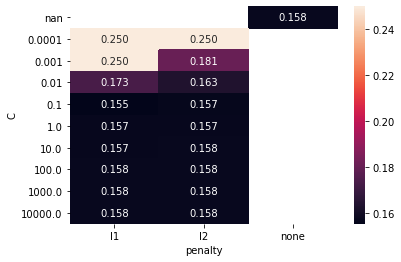

In [147]:
results11 = pd.DataFrame( best_model11.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results11['score_acc'] = 1 - best_model11.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols11 = results11.columns.to_series().str.split('__').apply(lambda x: x[-1])
results11.columns = cols11

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results11.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results11

In [242]:
#assigning result
acc_11 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1554")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.250000
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.250000
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.250000
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.176983
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.160161
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.138538
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.129282
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.128754
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.126944
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.127345


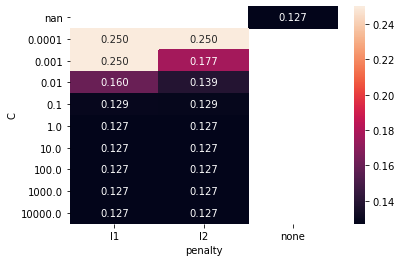

In [149]:
results11 = pd.DataFrame( best_model11.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results11['score_precision'] = 1 - best_model11.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols11 = results11.columns.to_series().str.split('__').apply(lambda x: x[-1])
results11.columns = cols11

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results11.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results11

In [243]:
#assigning result
precision_11 = ("C = 10.0, penality = l1, solver = saga, precision = 0.126937")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2500
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2500
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2500
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1808
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1734
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1632
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1554
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1568
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1570
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1572


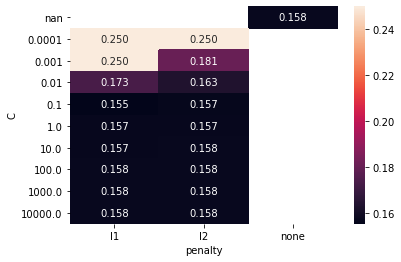

In [151]:
results11 = pd.DataFrame( best_model11.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results11['score_f1_micro'] = 1 - best_model11.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols11 = results11.columns.to_series().str.split('__').apply(lambda x: x[-1])
results11.columns = cols11

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results11.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results11

In [244]:
#assigning result
f1micro_11 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1554")

#### Trial 12

In [153]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 12)


In [154]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model12 = clf.fit(X_train, Y_train)

Wall time: 3min 39s


In [155]:
best_model12.cv_results_

{'mean_fit_time': array([0.04480557, 0.15342441, 0.05748839, 0.17702975, 0.62213373,
        0.31002116, 2.60150976, 0.95268946, 3.70422492, 2.45661526,
        4.19369636, 2.58613248, 4.20872564, 2.55486073, 4.60998459,
        2.58698421, 5.25269399, 2.82586303, 0.03311181, 0.03111696,
        0.03789907, 0.06775713, 0.07703805, 0.12887454, 0.13057227,
        0.14611874, 0.23042893, 0.15580292, 2.6643939 ]),
 'std_fit_time': array([0.01383164, 0.01371255, 0.0091185 , 0.00633932, 0.02684459,
        0.01011486, 0.66748065, 0.05872999, 0.86140429, 0.4687876 ,
        0.95836931, 0.56159535, 0.88693132, 0.58723527, 0.90448679,
        0.60354757, 1.13284457, 0.67032319, 0.00182821, 0.00146595,
        0.00244302, 0.02403765, 0.00744769, 0.07922908, 0.0668227 ,
        0.04860917, 0.11424803, 0.10990197, 0.61538714]),
 'mean_score_time': array([0.01747012, 0.01117477, 0.00548902, 0.00679078, 0.00498629,
        0.00512409, 0.00537982, 0.00558038, 0.00478597, 0.00598383,
        0.006781

In [156]:
best_model12.cv_results_['rank_test_accuracy']

array([28, 26, 28, 24, 23, 21,  5, 19,  1,  2,  2,  2,  5,  5,  5,  5,  5,
        5, 26, 25, 21, 20, 16, 16, 16,  5,  5,  5,  5])

In [157]:
best_model12.cv_results_['params'][ np.argmin(best_model12.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [158]:
best_model12.cv_results_['params'][ np.argmin(best_model12.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [159]:
best_model12.cv_results_['params'][ np.argmin(best_model12.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2472
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2468
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2472
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1822
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1692
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1634
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1550
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1556
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1546
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1548


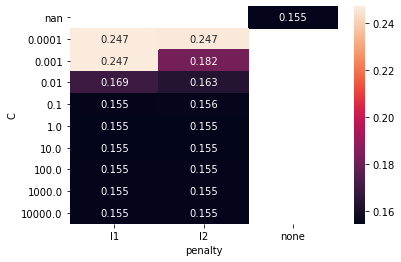

In [160]:
results12 = pd.DataFrame( best_model12.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results12['score_acc'] = 1 - best_model12.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols12 = results12.columns.to_series().str.split('__').apply(lambda x: x[-1])
results12.columns = cols12

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results12.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results12

In [245]:
#assigning result
acc_12 = ("c = 1.0, penalty = l1, solver = saga, acc = 0.1546")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.247200
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.246898
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.247200
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.175124
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.154726
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.135150
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.125903
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.123333
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.122627
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.121698


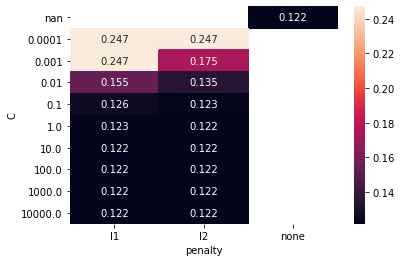

In [162]:
results12 = pd.DataFrame( best_model12.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results12['score_precision'] = 1 - best_model12.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols12 = results12.columns.to_series().str.split('__').apply(lambda x: x[-1])
results12.columns = cols12

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results12.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results12

In [246]:
#assigning result
precision_12 = ("C = 1.0, penality = l2, solver = saga, precision = 0.121698")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2472
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2468
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2472
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1822
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1692
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1634
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1550
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1556
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1546
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1548


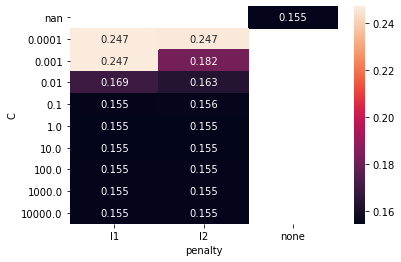

In [164]:
results12 = pd.DataFrame( best_model12.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results12['score_f1_micro'] = 1 - best_model12.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols12 = results12.columns.to_series().str.split('__').apply(lambda x: x[-1])
results12.columns = cols12

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results12.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results12

In [247]:
#assigning result
f1micro_12 = ("c = 1.0, penalty = l1, solver = saga, f1_micro = 0.1546")

#### Trial 13

In [166]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 13)


In [167]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model13 = clf.fit(X_train, Y_train)

Wall time: 3min 21s


In [168]:
best_model13.cv_results_

{'mean_fit_time': array([0.03231635, 0.1498033 , 0.05428867, 0.18985929, 0.61230488,
        0.37767553, 2.8057261 , 1.1373137 , 4.62552977, 2.05120511,
        3.7099184 , 2.31829858, 3.79118142, 2.46017056, 3.94644003,
        2.28416166, 4.06680536, 2.27806907, 0.03570504, 0.04208813,
        0.03909593, 0.06642241, 0.06841764, 0.08441963, 0.10473738,
        0.11961884, 0.14721413, 0.18053718, 2.22626834]),
 'std_fit_time': array([0.00408397, 0.00984034, 0.00505431, 0.00749102, 0.09773585,
        0.04186218, 0.57806382, 0.06103202, 0.70996949, 0.19032052,
        0.30614947, 0.22287795, 0.3806282 , 0.21435303, 0.40666252,
        0.31165388, 0.43414098, 0.19736808, 0.00872632, 0.02189981,
        0.00562069, 0.01271894, 0.01153821, 0.01624041, 0.01154867,
        0.05896083, 0.04661836, 0.0887555 , 0.23115208]),
 'mean_score_time': array([0.00578475, 0.01116958, 0.00638309, 0.00758429, 0.00577755,
        0.00578446, 0.00628381, 0.00598364, 0.00577874, 0.00658197,
        0.005584

In [169]:
best_model13.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21,  1,  2, 20,  4, 11, 11, 11, 11, 11, 11, 11,
       11, 26, 25, 21,  2,  5,  5,  5,  5,  5,  5, 11])

In [170]:
best_model13.cv_results_['params'][ np.argmin(best_model13.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [171]:
best_model13.cv_results_['params'][ np.argmin(best_model13.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [172]:
best_model13.cv_results_['params'][ np.argmin(best_model13.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2382
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2382
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2382
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1716
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1624
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1562
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1490
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1504
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1518
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1506


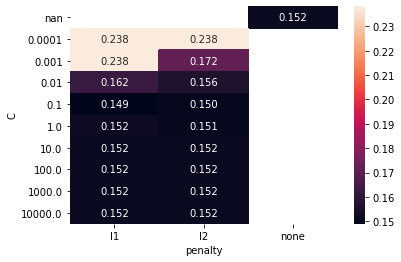

In [173]:
results13 = pd.DataFrame( best_model13.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results13['score_acc'] = 1 - best_model13.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols13 = results13.columns.to_series().str.split('__').apply(lambda x: x[-1])
results13.columns = cols13

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results13.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results13

In [248]:
#assigning result
acc_13 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1490")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.238200
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.238200
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.238200
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.168139
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.152343
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.131902
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.121314
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.120020
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.119277
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.118525


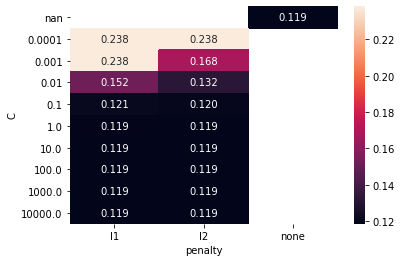

In [175]:
results13 = pd.DataFrame( best_model13.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results13['score_precision'] = 1 - best_model13.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols13 = results13.columns.to_series().str.split('__').apply(lambda x: x[-1])
results13.columns = cols13

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results13.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results13

In [249]:
#assigning result
precision_13 = ("C = 1.0, penality = l2, solver = saga, precision = 0.118525")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2382
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2382
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2382
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1716
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1624
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1562
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1490
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1504
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1518
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1506


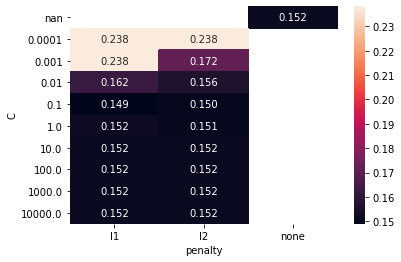

In [177]:
results13 = pd.DataFrame( best_model13.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results13['score_f1_micro'] = 1 - best_model13.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols13 = results13.columns.to_series().str.split('__').apply(lambda x: x[-1])
results13.columns = cols13

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results13.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results13

In [250]:
#assigning result
f1micro_13 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1490")

#### Trial 14

In [179]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 14)


In [180]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model14 = clf.fit(X_train, Y_train)

Wall time: 3min 45s


In [181]:
best_model14.cv_results_

{'mean_fit_time': array([0.03052082, 0.13713474, 0.06243305, 0.20834036, 0.62707944,
        0.37903142, 2.04451265, 1.4696847 , 6.55680575, 2.72792535,
        4.19193034, 2.57452784, 3.98216581, 2.57950206, 4.40383673,
        2.62319064, 4.67412672, 2.57472935, 0.02273941, 0.02293911,
        0.0253324 , 0.03430824, 0.04228702, 0.04926858, 0.07400231,
        0.06722054, 0.10093021, 0.06183481, 2.56715102]),
 'std_fit_time': array([4.89848898e-03, 5.33196411e-03, 8.52372290e-03, 1.30510412e-02,
        4.33852816e-02, 2.18797616e-02, 2.31901954e-01, 8.82622724e-02,
        8.51696173e-01, 2.15046203e-01, 3.17075958e-01, 2.32636027e-01,
        3.87619592e-01, 2.38212443e-01, 3.57000804e-01, 2.44046411e-01,
        4.19897115e-01, 2.27771597e-01, 1.46575238e-03, 3.23406696e-07,
        7.97832192e-04, 1.73869646e-03, 1.73886601e-03, 3.71050407e-03,
        1.30250021e-02, 5.29977059e-03, 3.44066968e-02, 7.69921701e-03,
        2.39522330e-01]),
 'mean_score_time': array([0.00548735, 

In [182]:
best_model14.cv_results_['rank_test_accuracy']

array([28, 26, 28, 24, 23, 21,  1,  2,  3,  5,  7,  9,  9,  9,  9,  9,  9,
        9, 26, 24, 21,  3,  6,  8, 17, 18, 18, 18,  9])

In [183]:
best_model14.cv_results_['params'][ np.argmin(best_model14.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [184]:
best_model14.cv_results_['params'][ np.argmin(best_model14.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [185]:
best_model14.cv_results_['params'][ np.argmin(best_model14.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2398
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2396
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2398
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1688
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1606
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1520
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1452
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1464
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1466
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1476


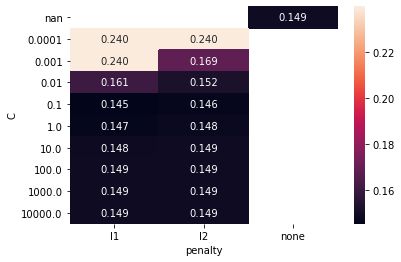

In [186]:
results14 = pd.DataFrame( best_model14.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results14['score_acc'] = 1 - best_model14.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols14 = results14.columns.to_series().str.split('__').apply(lambda x: x[-1])
results14.columns = cols14

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results14.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results14

In [251]:
#assigning result
acc_14 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.1452")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.239800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.239648
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.239800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.166323
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.148782
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.129203
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.122107
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.120414
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.119693
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.119848


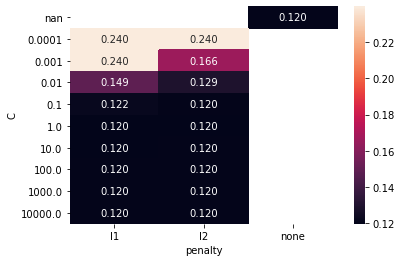

In [188]:
results14 = pd.DataFrame( best_model14.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results14['score_precision'] = 1 - best_model14.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols14 = results14.columns.to_series().str.split('__').apply(lambda x: x[-1])
results14.columns = cols14

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results14.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results14

In [252]:
#assigning result
precision_14 = ("C = 1.0, penality = l1, solver = saga, precision = 0.119693")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2398
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2396
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2398
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1688
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1606
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1520
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1452
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1464
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1466
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1476


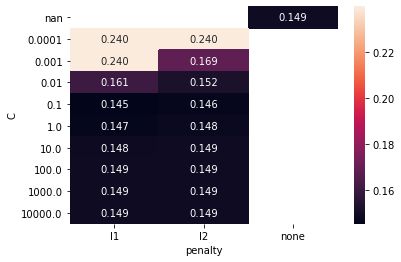

In [190]:
results14 = pd.DataFrame( best_model14.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results14['score_f1_micro'] = 1 - best_model14.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols14 = results14.columns.to_series().str.split('__').apply(lambda x: x[-1])
results14.columns = cols14

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results14.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results14

In [253]:
#assigning result
f1micro_14 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1452")

#### Trial 15

In [192]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 15)


In [193]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model15 = clf.fit(X_train, Y_train)

Wall time: 2min 28s


In [194]:
best_model15.cv_results_

{'mean_fit_time': array([0.02852383, 0.11409478, 0.04128938, 0.15877533, 0.47633586,
        0.32096176, 2.69260941, 0.92633085, 3.95903091, 1.46768036,
        2.43948164, 1.61749291, 2.57911472, 1.67194967, 2.74865503,
        1.64101882, 2.84820471, 1.74235039, 0.02134318, 0.02234044,
        0.02513299, 0.04109044, 0.04228706, 0.04986701, 0.05964088,
        0.07001309, 0.07260604, 0.08218007, 1.6356359 ]),
 'std_fit_time': array([5.22457221e-03, 5.62778263e-03, 3.12834730e-03, 1.59552694e-03,
        7.11860289e-02, 9.79165616e-03, 8.61302601e-01, 3.38723782e-02,
        2.02212169e+00, 2.49366381e-01, 5.51387082e-01, 3.39851350e-01,
        5.11620229e-01, 3.30864813e-01, 6.06063972e-01, 3.70140520e-01,
        6.65752950e-01, 4.44026653e-01, 4.88558226e-04, 1.01734538e-03,
        7.46518620e-04, 1.17567633e-02, 2.86296647e-03, 1.66866784e-03,
        6.19319232e-03, 9.77980115e-03, 7.63185401e-03, 1.96916100e-02,
        3.58059126e-01]),
 'mean_score_time': array([0.00578456, 

In [195]:
best_model15.cv_results_['rank_test_accuracy']

array([26, 26, 26, 24, 23, 21, 20,  1,  4,  3, 18, 18, 11, 11,  6,  6,  6,
        6, 26, 24, 21,  1, 11,  4, 14, 14, 14, 14,  6])

In [196]:
best_model15.cv_results_['params'][ np.argmin(best_model15.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [197]:
best_model15.cv_results_['params'][ np.argmin(best_model15.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 1.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [198]:
best_model15.cv_results_['params'][ np.argmin(best_model15.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2478
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2478
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2478
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1804
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1760
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1592
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1546
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1532
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1540
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1538


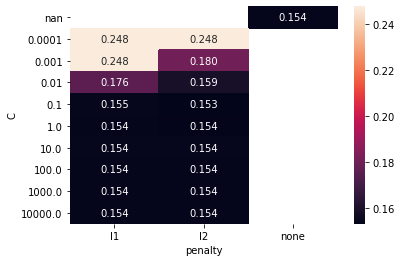

In [199]:
results15 = pd.DataFrame( best_model15.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results15['score_acc'] = 1 - best_model15.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols15 = results15.columns.to_series().str.split('__').apply(lambda x: x[-1])
results15.columns = cols15

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results15.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results15

In [254]:
#assigning result
acc_15 = ("c = 0.1, penalty = l2, solver = saga, acc = 0.1532")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.247800
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.247800
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.247800
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.173494
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.157779
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.132855
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.126045
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.123161
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.122491
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.122081


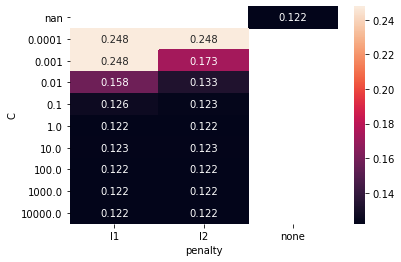

In [201]:
results15 = pd.DataFrame( best_model15.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results15['score_precision'] = 1 - best_model15.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols15 = results15.columns.to_series().str.split('__').apply(lambda x: x[-1])
results15.columns = cols15

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results15.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results15

In [255]:
#assigning result
precision_15 = ("C = 1.0, penality = l2, solver = saga, precision = 0.122081")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.2478
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.2478
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.2478
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.1804
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.1760
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.1592
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.1546
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.1532
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.1540
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.1538


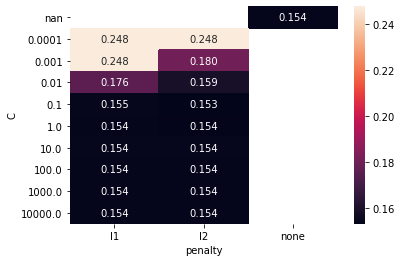

In [203]:
results15 = pd.DataFrame( best_model15.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results15['score_f1_micro'] = 1 - best_model15.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols15 = results15.columns.to_series().str.split('__').apply(lambda x: x[-1])
results15.columns = cols15

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results15.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results15

In [256]:
#assigning result
f1micro_15 = ("c = 0.1, penalty = l2, solver = saga, f1_micro = 0.1532")

## Training Results

In [ ]:
#adding results into a list
acc_List = [acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7,acc_8,acc_9,acc_10,acc_11,acc_12,acc_13,acc_14,acc_15]
precision_List = [precision_1,precision_2,precision_3,precision_4,precision_5,precision_6,precision_7,precision_8,precision_9,precision_10,precision_11,precision_12,precision_13,precision_14,precision_15]
f1micro_List = [f1micro_1,f1micro_2,f1micro_3,f1micro_4,f1micro_5,f1micro_6,f1micro_7,f1micro_8,f1micro_9,f1micro_10,f1micro_11,f1micro_12,f1micro_13,f1micro_14,f1micro_15]

In [258]:
#creating dataframe of results
data = {'Acc': acc_List, 'Precision': precision_List, 'F1_micro':f1micro_List}

In [261]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Acc,Precision,F1_micro
0,"c = 0.1, penalty = l1, solver = saga, acc = 0.1528","C = 10.0000, penality = l2, solver = saga, precision = 0.123218","c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1528"
1,"c = 1.0, penalty = l1, solver = saga, acc = 0.1412","C = 10.0, penality = l2, solver = saga, precision = 0.112837","c = 1.0, penalty = l1, solver = saga, f1_micro = 0.1412"
2,"c = 1.0, penalty = l1, solver = saga, acc = 0.1572","C = 1.0, penality = l1, solver = saga, precision = 0.125419","c = 1.0, penalty = l1, solver = saga, f1_micro = 0.1572"
3,"c = 1.0, penalty = l1, solver = saga, acc = 0.1468","c = 1.0, penalty = l1, solver = saga, precision = 0.116499","c = 1.0, penalty = l1, solver = saga, f1_micro = 0.1468"
4,"c = 0.1, penalty = l1, solver = saga, acc = 0.1486","C = 1.0, penality = l1, solver = saga, precision = 0.118158","c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1486"
5,"c = 0.1, penalty = l1, solver = saga, acc = 0.1484","C = 10.0, penality = l1, solver = saga, precision = 0.120993","c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1484"
6,"c = 0.1, penalty = l1, solver = saga, acc = 0.1554","C = 1.0, penality = l1, solver = saga, precision = 0.124527","c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1554"
7,"c = 10, penalty = l2, solver = lbfgs, acc = 0.1402","c = 10, penalty = l2, solver = lbfgs, precision = 0.112217","c = 10, penalty = l2, solver = lbfgs, f1_micro = 0.1402"
8,"c = 0.1, penalty = l1, solver = saga, acc = 0.1556","C = 1.0, penality = l1, solver = saga, precision = 0.124527","c = 0.1, penalty = l1, solver = saga, f1_micro = 0.1556"
9,"c = 10, penalty = l1, solver = saga, acc = 0.1460","c = 10, penalty = l1, solver = saga, precision = 0.115556","c = 10, penalty = l1, solver = saga, f1_micro = 0.1460"


## Testing Dataset

In [263]:
#defining X and Y
X_adult_data = adult_data_df.iloc[:,0:-1]
Y_adult_data = adult_data_df.loc[:, "more or less than $50k"]
X_train, X_test, Y_train, Y_test = train_test_split( X_adult_data, Y_adult_data, train_size=5000, shuffle=True, random_state = 16)


In [264]:
%%time
# Create a pipeline - RF is a stand in, we will populate the classifier part below
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

# Create search space of candidate learning algorithms and their hyperparameters
# note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': np.logspace(-4, 4, 9)},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','saga'],
                 'classifier__penalty': ['none']}
                ]

# Create grid search
clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5),
                   scoring=['accuracy', 'precision','f1_micro'], refit=False,
                   verbose=0)

# Fit grid search
best_model16 = clf.fit(X_test, Y_test)

Wall time: 17min 30s


In [265]:
best_model16.cv_results_

{'mean_fit_time': array([ 0.19338417,  0.74212971,  1.59265847,  1.31874642,  8.51072025,
         3.85426579, 19.37090654,  8.60065579, 21.80431414, 10.42429242,
        16.48452058, 10.79809866, 17.30747423, 10.76169534, 19.33038511,
        11.74831057, 21.05685563, 11.84114718,  0.20346985,  0.14866576,
         0.23236957,  0.3353447 ,  0.41361041,  0.30908332,  0.35107636,
         0.34868007,  0.34499288,  0.40882273, 10.90009193]),
 'std_fit_time': array([4.09387946e-02, 1.56139557e-01, 5.32746006e-01, 4.00688834e-01,
        3.01692449e+00, 1.15112133e+00, 7.69349716e+00, 2.49749551e+00,
        6.47534806e+00, 3.24661420e+00, 4.82826102e+00, 3.35608921e+00,
        5.42680359e+00, 3.19620322e+00, 5.68463718e+00, 3.54749125e+00,
        7.00882386e+00, 3.38895025e+00, 5.14029778e-02, 3.95041280e-03,
        4.34837628e-02, 3.00825867e-02, 1.37614363e-01, 2.45456715e-02,
        4.44908115e-02, 3.11859560e-02, 3.49885520e-02, 5.68150264e-02,
        3.14884203e+00]),
 'mean_sco

In [266]:
best_model16.cv_results_['rank_test_accuracy']

array([29, 27, 26, 25, 23, 22,  3,  1,  2,  4,  5,  7,  7,  7, 16,  7, 16,
       16, 27, 24, 21, 11,  5, 20, 12, 12, 12, 12, 16])

In [267]:
best_model16.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [268]:
best_model16.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 10.0,
 'classifier__penalty': 'l2',
 'classifier__solver': 'saga'}

In [269]:
best_model16.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1_micro'])]

{'classifier': LogisticRegression(max_iter=5000),
 'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

,classifier,C,penalty,solver,score_acc
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.241573
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.190341
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.177279
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.159972
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.152026
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.151409
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.150321
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.150321
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.150321
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.150466


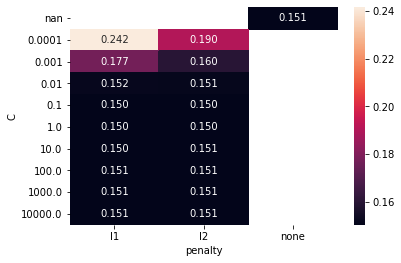

In [273]:
results16 = pd.DataFrame( best_model16.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results16['score_acc'] = 1 - best_model16.cv_results_['mean_test_accuracy']

# get rid of classifierXX in columns
cols16 = results16.columns.to_series().str.split('__').apply(lambda x: x[-1])
results16.columns = cols16

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results16.query('solver=="saga"').pivot('C','penalty','score_acc'),
             annot=True, fmt='.3f')

results16

In [274]:
#assigning result
acc_16 = ("c = 0.1, penalty = l1, solver = saga, acc = 0.150321")

,classifier,C,penalty,solver,score_precision
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.241573
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.193492
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.168056
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.138818
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.127608
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.122575
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.120935
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.120732
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.120457
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.120513


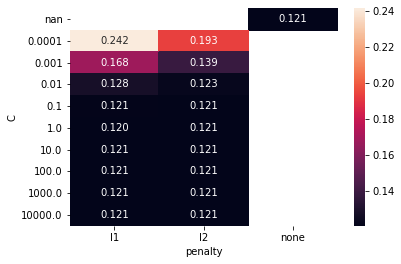

In [277]:
results16 = pd.DataFrame( best_model16.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results16['score_precision'] = 1 - best_model16.cv_results_['mean_test_precision']

# get rid of classifierXX in columns
cols16 = results16.columns.to_series().str.split('__').apply(lambda x: x[-1])
results16.columns = cols16

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results16.query('solver=="saga"').pivot('C','penalty','score_precision'),
             annot=True, fmt='.3f')

results16

In [278]:
##assigning result
precision_16 = ("C = 10, penality = l2, solver = saga, precision = 0.120587")

,classifier,C,penalty,solver,score_f1_micro
0,LogisticRegression(max_iter=5000),0.0001,l1,saga,0.241573
1,LogisticRegression(max_iter=5000),0.0001,l2,saga,0.190341
2,LogisticRegression(max_iter=5000),0.0010,l1,saga,0.177279
3,LogisticRegression(max_iter=5000),0.0010,l2,saga,0.159972
4,LogisticRegression(max_iter=5000),0.0100,l1,saga,0.152026
5,LogisticRegression(max_iter=5000),0.0100,l2,saga,0.151409
6,LogisticRegression(max_iter=5000),0.1000,l1,saga,0.150321
7,LogisticRegression(max_iter=5000),0.1000,l2,saga,0.150321
8,LogisticRegression(max_iter=5000),1.0000,l1,saga,0.150321
9,LogisticRegression(max_iter=5000),1.0000,l2,saga,0.150466


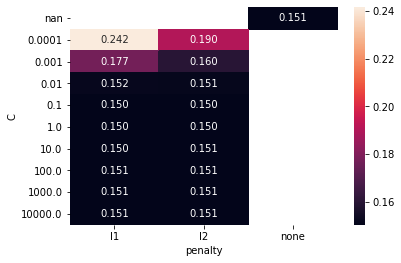

In [279]:
results16 = pd.DataFrame( best_model16.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results16['score_f1_micro'] = 1 - best_model16.cv_results_['mean_test_f1_micro']

# get rid of classifierXX in columns
cols16 = results16.columns.to_series().str.split('__').apply(lambda x: x[-1])
results16.columns = cols16

# lets show the results for the saga solver across penalty & C values
sns.heatmap( results16.query('solver=="saga"').pivot('C','penalty','score_f1_micro'),
             annot=True, fmt='.3f')

results16

In [280]:
##assigning result
f1micro_16 = ("c = 0.1, penalty = l1, solver = saga, f1_micro = 0.150321")

## Testing Results

In [289]:
#defining results
test_acc = [acc_16]
test_precision = [precision_16]
test_f1micro = [f1micro_16]

In [290]:
#adding result to a dataframe
data = {'Acc': test_acc, 'Precision': test_precision, 'F1_micro': test_f1micro}

In [291]:
trainingResults  = pd.DataFrame(data = data)
pd.options.display.max_colwidth = 100
trainingResults

,Acc,Precision,F1_micro
0,"c = 0.1, penalty = l1, solver = saga, acc = 0.150321","C = 10, penality = l2, solver = saga, precision = 0.120587","c = 0.1, penalty = l1, solver = saga, f1_micro = 0.150321"
